## SETUP

- imported pandas to read csv
- imports from sckit library: 
- train_test_split to divide our data into train and test
- OneHotEncoder 
- Standard Scalar to scale our data 
- confusion matrix 
- Logistic Regression, GaussianNB and SVC for ML model

- imported sns and plt for creating plots 


In [512]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB  
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
import pandas as pd




## DATA INGESTION

In [513]:
df = pd.read_csv(r'data\clean\clean_credit_default.csv')

## 1st MODEL: LOGISTIC REGRESSION 

In [514]:
x1 = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'Repay_mean', 'BILL_APR', 'BILL_MAY', 'BILL_JUN', 'BILL_JUL', 'BILL_JUL', 'BILL_AUG', 'BILL_SEPT', 'PAID_APR', 'PAID_MAY', 'PAID_JUN', 'PAID_JUL', 'PAID_AUG', 'PAID_SEPT']]
y1 = df['default.payment.next.month']

- One hot encoding to change strings in data to numeric format

In [515]:
column_transformer1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['SEX', 'MARRIAGE'])],remainder='passthrough')

- Fitting the data on x

In [516]:
x1 = column_transformer1.fit_transform(x1)

- divided data for training and testing

In [517]:
x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, test_size= 0.25, random_state=50) 

- Performed feature scaling to normalize the range

In [518]:
st_x1= StandardScaler()    
x1_train= st_x1.fit_transform(x1_train)    
x1_test= st_x1.transform(x1_test)  

- fit train and test data to logistic regression model

In [519]:
logreg1 = LogisticRegression()
logreg1.fit(x1_train, y1_train)

LogisticRegression()

- predicting on test set

In [520]:
y1_pred= logreg1.predict(x1_test)  

- Checking accuracy

In [521]:
accuracy1 = logreg1.score(x1_test, y1_test)
print('Accuracy:', accuracy1)

Accuracy: 0.8050666666666667


- Visual representation of accuracy using confusion matrix

Text(0.5, 1.0, 'confusion matrix')

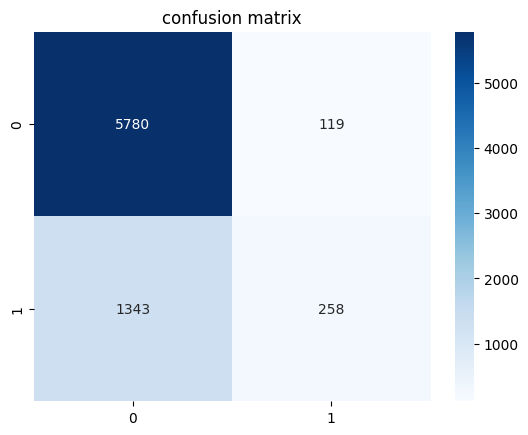

In [522]:
cm= confusion_matrix(y1_test, y1_pred) 

sns.heatmap(cm, annot=True, cmap = 'Blues', fmt='g')
plt.title("confusion matrix")

## 2nd MODEL: LOGISTIC REGRESSION 

- removing variables we found to be not as important during EDA and checking

In [523]:
x2 = df[['SEX', 'EDUCATION', 'MARRIAGE', 'Repay_Sum']]
y2 = df['default.payment.next.month']

- One hot encoding the data

In [524]:
column_transformer2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ['SEX', 'MARRIAGE'])],remainder='passthrough')

- Fitting the one hot encoded data on x

In [525]:
x2 = column_transformer2.fit_transform(x2)

- divided data for training and testing

In [526]:
x2_train, x2_test, y2_train, y2_test= train_test_split(x2, y2, test_size= 0.25, random_state=50) 

- Performed feature scaling on the data to normalize the range 

In [527]:
x2_train= st_x1.fit_transform(x2_train)    
x2_test= st_x1.transform(x2_test)  

- fit train and test data to logistic regression model

In [528]:
logreg1 = LogisticRegression()
logreg1.fit(x2_train, y2_train)

LogisticRegression()

- predicting on test set

In [529]:
y2_pred = logreg1.predict(x2_test)  

- Checking Accuracy

In [530]:
accuracy2 = logreg1.score(x2_test, y2_test)
print('Accuracy:', accuracy2)

Accuracy: 0.8065333333333333


In [531]:
precision2 = precision_score(y2_test, y2_pred)
print("Precision:", precision2)

Precision: 0.7130681818181818


In [532]:
recall2 = recall_score(y2_test, y2_pred)
print("Recall:", recall2)

Recall: 0.15677701436602123


In [533]:
f1_2 = f1_score(y2_test, y2_pred)
print("F1 Score:", f1_2)

F1 Score: 0.2570404505888377


In [534]:
kappa2 = cohen_kappa_score(y2_test, y2_pred)
print("Kappa Score:", kappa2)

Kappa Score: 0.19510493627553505


- Visual representation of accuracy using confusion matrix

Text(0.5, 1.0, 'Confusion matrix for new dataset')

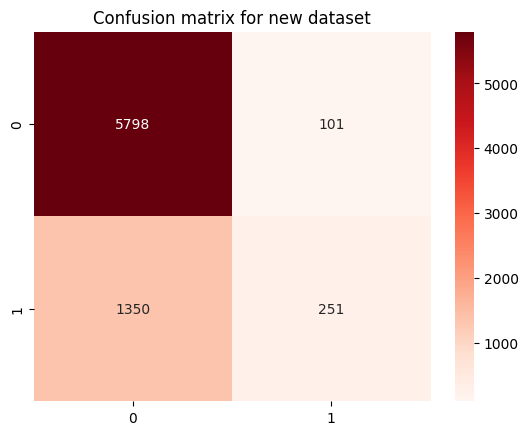

In [535]:
cm2 = confusion_matrix(y2_test, y2_pred)

sns.heatmap(cm2, annot=True, cmap='Reds', fmt='g')

plt.title("Confusion matrix for new dataset")

## 3rd MODEL: NAIVE BAYES CLASSIFIER

-Fit train and test data to naive bayes classification model

In [536]:
nbclass = GaussianNB()  
nbclass.fit(x2_train, y2_train)

GaussianNB()

- Predicting on test set

In [537]:
y3_pred = nbclass.predict(x2_test)

- Checking accuracy 

In [538]:
accuracy3 = nbclass.score(x2_test, y2_test)
print("Accuracy", accuracy3)

Accuracy 0.7992


In [539]:
precision3 = precision_score(y2_test, y3_pred)
print("Precision:", precision3)

# Calculate recall
recall3 = recall_score(y2_test, y3_pred)
print("Recall:", recall3)

# Calculate F1 score
f1_3= f1_score(y2_test, y3_pred)
print("F1 Score:", f1_3)

kappa3 = cohen_kappa_score(y2_test, y3_pred)
print("Kappa Score:", kappa3)

Precision: 0.5826086956521739
Recall: 0.20924422236102436
F1 Score: 0.3079044117647059
Kappa Score: 0.2198966078107032


- Visual representation of accuracy using confusion matrix

Text(0.5, 1.0, 'Confusion Matric for naive bayes')

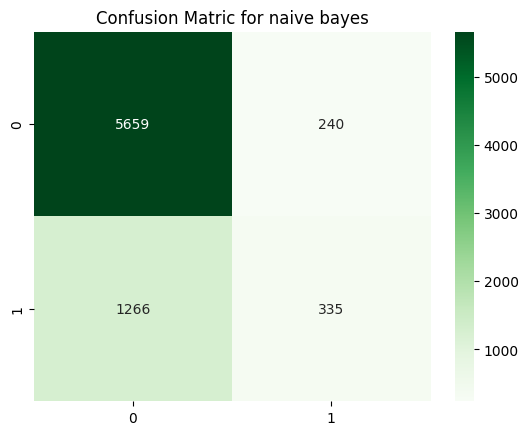

In [540]:
cm3 = confusion_matrix(y2_test, y3_pred)

sns.heatmap(cm3, annot=True, cmap='Greens', fmt='g')
plt.title("Confusion Matric for naive bayes")

## 4th MODEL: SVM (support vector machine)

- Fit train and test data to svm

In [541]:
svm = SVC(kernel='linear', random_state=50)  
svm.fit(x2_train, y2_train) 

SVC(kernel='linear', random_state=50)

- Predicting on test set

In [542]:
y4_pred = svm.predict(x2_test)

- Checking accuracy 

In [543]:
accuracy4 = svm.score(x2_test, y2_test)
print("Accuracy: ",accuracy4)

Accuracy:  0.7865333333333333


In [544]:
precision4 = precision_score(y2_test, y4_pred)
print("Precision:", precision4)

# Calculate recall
recall4 = recall_score(y2_test, y4_pred)
print("Recall:", recall4)

# Calculate F1 score
f1_4= f1_score(y2_test, y4_pred)
print("F1 Score:", f1_4)

kappa4 = cohen_kappa_score(y2_test, y4_pred)
print("Kappa Score:", kappa4)

Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Kappa Score: 0.0


d:\source\repos\OrionDataAnalyticsInternshipJul23\Orion.venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Visual representation of accuracy using confusion matrix

Text(0.5, 1.0, 'Confusion matrix for SVM')

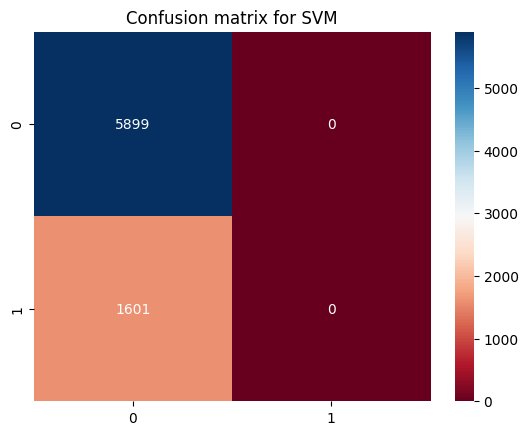

In [545]:
cm4 = confusion_matrix(y2_test, y4_pred)

sns.heatmap(cm4, annot=True, cmap='RdBu', fmt='g')
plt.title("Confusion matrix for SVM")

## 5th MODEL: LOGISTIC REGRESSION 

In [546]:
x5 = df[['REPAY_SEPT']]
y5 = df['default.payment.next.month']

In [547]:
x5_train, x5_test, y5_train, y5_test= train_test_split(x5, y5, test_size= 0.25, random_state=50) 

In [548]:
logreg1.fit(x5_train, y5_train)

LogisticRegression()

In [549]:
y5_pred = logreg1.predict(x5_test)  

In [550]:
accuracy5 = logreg1.score(x5_test, y5_test)
print('Accuracy:', accuracy5)

Accuracy: 0.8261333333333334


In [551]:
accuracy5 = accuracy_score(x5_test, y5_test)
print('Accuracy:', accuracy5)

Accuracy: 0.46773333333333333


In [552]:
precision5 = precision_score(y2_test, y5_pred)
print("Precision:", precision5)

# Calculate recall
recall5 = recall_score(y2_test, y5_pred)
print("Recall:", recall5)

# Calculate F1 score
f1_5= f1_score(y2_test, y5_pred)
print("F1 Score:", f1_5)

kappa5 = cohen_kappa_score(y2_test, y5_pred)
print("Kappa Score:", kappa5)

Precision: 0.6931079323797139
Recall: 0.3329169269206746
F1 Score: 0.449789029535865
Kappa Score: 0.3613128794980258


Text(0.5, 1.0, 'Confusion matrix for new dataset')

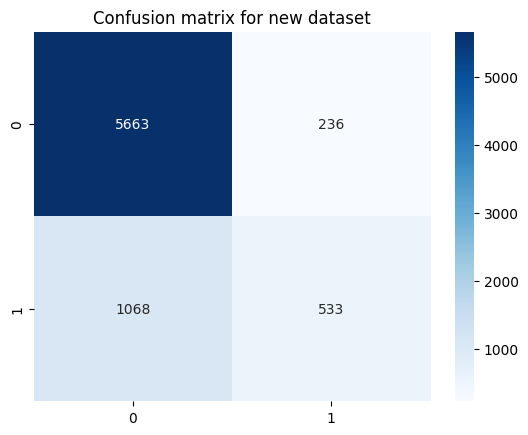

In [553]:
cm5 = confusion_matrix(y5_test, y5_pred)

sns.heatmap(cm5, annot=True, cmap='Blues', fmt='g')

plt.title("Confusion matrix for new dataset")

## 6th MODEL: RANDOM FOREST

In [554]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x2_train, y2_train)

RandomForestClassifier()

In [555]:
y6_pred = rf_classifier.predict(x2_test)

In [ ]:
accuracy6 = accuracy_score(y2_test, y6_pred)
print('Accuracy:', accuracy6)

Accuracy: 0.8113333333333334


Text(0.5, 1.0, 'Confusion matrix for new dataset')

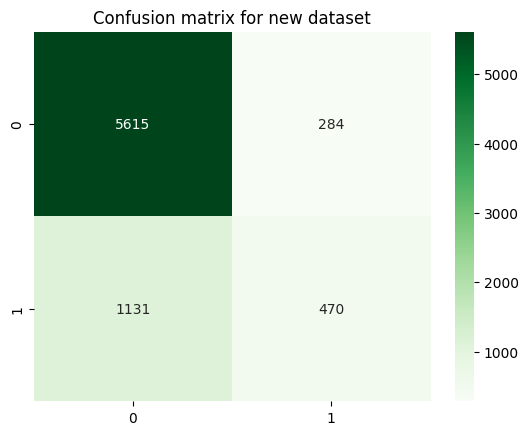

In [ ]:
cm6 = confusion_matrix(y2_test, y6_pred)

sns.heatmap(cm6, annot=True, cmap='Greens', fmt='g')

plt.title("Confusion matrix for new dataset")

In [ ]:
precision6 = precision_score(y2_test, y6_pred)
print("Precision:", precision4)

# Calculate recall
recall6 = recall_score(y2_test, y6_pred)
print("Recall:", recall4)

# Calculate F1 score
f1_6= f1_score(y2_test, y6_pred)
print("F1 Score:", f1_4)

kappa6 = cohen_kappa_score(y2_test, y6_pred)
print("Kappa Score:", kappa4)

Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Kappa Score: 0.0
